In [1]:
import pandas as pd
import tushare as ts
import numpy as np
pro = ts.pro_api('7e33b6a3e2bad955cd087c9e5a6e69ad34dc797daee4ff6de9cb08f7')
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = 10,7

In [2]:
def data_process(code):
    c = code + '.'+ 'csv'
    data = pd.read_csv('D:\\study\\spider work\\ifind_http\\DATABASE\\%s'%c,encoding='utf-8',header=None)
    data = data.rename(columns={0:'trade_date',1:'open',2:'high',3:'low',4:'close',5:'vol'})
    return data

In [3]:
def time(data, col):
    times = data[col].astype(str)
    formatStr = '%Y-%m-%d %H:%M:%S'
    data.index = pd.to_datetime(times, format=formatStr)
    data = data.drop(columns=[col])
    return data

In [46]:
ih = data_process(code = 'IH2503.CFE')
ih

,trade_date,open,high,low,close,vol
0,2024-07-22 09:30:00,2429.0,2429.0,2429.0,2429.0,0.0
1,2024-07-22 09:31:00,2429.0,2432.8,2429.0,2430.0,16.0
2,2024-07-22 09:32:00,2430.0,2434.4,2426.8,2428.0,45.0
3,2024-07-22 09:33:00,2426.4,2428.8,2426.4,2428.8,14.0
4,2024-07-22 09:34:00,2429.2,2433.4,2426.6,2427.2,31.0
...,...,...,...,...,...,...
38073,2025-03-18 14:56:00,2740.4,2740.6,2739.8,2740.4,145.0
38074,2025-03-18 14:57:00,2740.0,2740.6,2739.8,2740.4,148.0
38075,2025-03-18 14:58:00,2740.4,2740.4,2739.6,2739.8,206.0
38076,2025-03-18 14:59:00,2740.0,2740.4,2739.6,2740.0,250.0


In [47]:
im = data_process(code='IM2503.CFE')
im

,trade_date,open,high,low,close,vol
0,2024-07-22 09:30:00,4569.6,4569.6,4569.6,4569.6,4.0
1,2024-07-22 09:31:00,4569.6,4569.6,4538.2,4550.6,51.0
2,2024-07-22 09:32:00,4556.2,4562.0,4556.2,4557.2,36.0
3,2024-07-22 09:33:00,4560.6,4564.4,4559.2,4563.6,37.0
4,2024-07-22 09:34:00,4562.8,4562.8,4547.6,4551.0,31.0
...,...,...,...,...,...,...
38073,2025-03-18 14:56:00,6583.0,6583.0,6581.0,6582.0,508.0
38074,2025-03-18 14:57:00,6582.2,6582.8,6581.6,6582.6,385.0
38075,2025-03-18 14:58:00,6582.0,6582.8,6578.4,6579.0,578.0
38076,2025-03-18 14:59:00,6579.4,6582.6,6578.8,6580.0,495.0


In [48]:
ih = time(ih,'trade_date')
ih

,open,high,low,close,vol
trade_date,,,,,
2024-07-22 09:30:00,2429.0,2429.0,2429.0,2429.0,0.0
2024-07-22 09:31:00,2429.0,2432.8,2429.0,2430.0,16.0
2024-07-22 09:32:00,2430.0,2434.4,2426.8,2428.0,45.0
2024-07-22 09:33:00,2426.4,2428.8,2426.4,2428.8,14.0
2024-07-22 09:34:00,2429.2,2433.4,2426.6,2427.2,31.0
...,...,...,...,...,...
2025-03-18 14:56:00,2740.4,2740.6,2739.8,2740.4,145.0
2025-03-18 14:57:00,2740.0,2740.6,2739.8,2740.4,148.0
2025-03-18 14:58:00,2740.4,2740.4,2739.6,2739.8,206.0


In [7]:
def cal_spread(code1,code2):
    data1 = data_process(code = code1)
    data2 = data_process(code = code2)
    data1 = data1.rename(columns={'close':'1_close'})
    data2 = data2.rename(columns={'close':'2_close'})
    data_merge = pd.merge(data1[['1_close']],data2[['2_close']],left_index=True,right_index=True,how='inner')
    data_merge['trade_date'] = data1['trade_date']
    data_merge['spread_price'] = 200*data_merge['1_close'] - 300*data_merge['2_close']
    return data_merge

In [49]:
df_spread = cal_spread(code1='IH2503.CFE',code2='IM2503.CFE')
df_spread

,1_close,2_close,trade_date,spread_price
0,2429.0,4569.6,2024-07-22 09:30:00,-885080.0
1,2430.0,4550.6,2024-07-22 09:31:00,-879180.0
2,2428.0,4557.2,2024-07-22 09:32:00,-881560.0
3,2428.8,4563.6,2024-07-22 09:33:00,-883320.0
4,2427.2,4551.0,2024-07-22 09:34:00,-879860.0
...,...,...,...,...
38073,2740.4,6582.0,2025-03-18 14:56:00,-1426520.0
38074,2740.4,6582.6,2025-03-18 14:57:00,-1426700.0
38075,2739.8,6579.0,2025-03-18 14:58:00,-1425740.0
38076,2740.0,6580.0,2025-03-18 14:59:00,-1426000.0


In [50]:
df_spread = time(df_spread,'trade_date')
df_spread

,1_close,2_close,spread_price
trade_date,,,
2024-07-22 09:30:00,2429.0,4569.6,-885080.0
2024-07-22 09:31:00,2430.0,4550.6,-879180.0
2024-07-22 09:32:00,2428.0,4557.2,-881560.0
2024-07-22 09:33:00,2428.8,4563.6,-883320.0
2024-07-22 09:34:00,2427.2,4551.0,-879860.0
...,...,...,...
2025-03-18 14:56:00,2740.4,6582.0,-1426520.0
2025-03-18 14:57:00,2740.4,6582.6,-1426700.0
2025-03-18 14:58:00,2739.8,6579.0,-1425740.0


In [51]:
df_day = df_spread.resample("D").last().dropna()
df_day

,1_close,2_close,spread_price
trade_date,,,
2024-07-22,2422.0,4541.6,-878080.0
2024-07-23,2394.2,4395.8,-839900.0
2024-07-24,2385.0,4335.8,-823740.0
2024-07-25,2362.2,4345.0,-831060.0
2024-07-26,2359.8,4427.6,-856320.0
...,...,...,...
2025-03-12,2670.0,6513.8,-1420140.0
2025-03-13,2663.8,6426.0,-1395040.0
2025-03-14,2747.0,6562.8,-1419440.0


In [52]:
df_day['return'] = df_day['spread_price'].pct_change()*(-1)
df_day

,1_close,2_close,spread_price,return
trade_date,,,,
2024-07-22,2422.0,4541.6,-878080.0,NaN
2024-07-23,2394.2,4395.8,-839900.0,0.043481
2024-07-24,2385.0,4335.8,-823740.0,0.019240
2024-07-25,2362.2,4345.0,-831060.0,-0.008886
2024-07-26,2359.8,4427.6,-856320.0,-0.030395
...,...,...,...,...
2025-03-12,2670.0,6513.8,-1420140.0,-0.005822
2025-03-13,2663.8,6426.0,-1395040.0,0.017674
2025-03-14,2747.0,6562.8,-1419440.0,-0.017491


In [53]:
### get the daily time line
daily_time = []
for i in range(len(df_day)):
    dt = df_day.index[i].strftime('%Y-%m-%d %H:%M:%S')[0:10]
    daily_time.append(dt)

daily_time

['2024-07-22',
 '2024-07-23',
 '2024-07-24',
 '2024-07-25',
 '2024-07-26',
 '2024-07-29',
 '2024-07-30',
 '2024-07-31',
 '2024-08-01',
 '2024-08-02',
 '2024-08-05',
 '2024-08-06',
 '2024-08-07',
 '2024-08-08',
 '2024-08-09',
 '2024-08-12',
 '2024-08-13',
 '2024-08-14',
 '2024-08-15',
 '2024-08-16',
 '2024-08-19',
 '2024-08-20',
 '2024-08-21',
 '2024-08-22',
 '2024-08-23',
 '2024-08-26',
 '2024-08-27',
 '2024-08-28',
 '2024-08-29',
 '2024-08-30',
 '2024-09-02',
 '2024-09-03',
 '2024-09-04',
 '2024-09-05',
 '2024-09-06',
 '2024-09-09',
 '2024-09-10',
 '2024-09-11',
 '2024-09-12',
 '2024-09-13',
 '2024-09-18',
 '2024-09-19',
 '2024-09-20',
 '2024-09-23',
 '2024-09-24',
 '2024-09-25',
 '2024-09-26',
 '2024-09-27',
 '2024-09-30',
 '2024-10-08',
 '2024-10-09',
 '2024-10-10',
 '2024-10-11',
 '2024-10-14',
 '2024-10-15',
 '2024-10-16',
 '2024-10-17',
 '2024-10-18',
 '2024-10-21',
 '2024-10-22',
 '2024-10-23',
 '2024-10-24',
 '2024-10-25',
 '2024-10-28',
 '2024-10-29',
 '2024-10-30',
 '2024-10-

calculate the intraday information

1. 10mins spread return atfer exchange opens

2. cumulate sum of returns, a time series for (profit taking or loss limiting),first touch returns

In [54]:
### one day calculation example
example = df_spread.loc[daily_time[1]]
example

,1_close,2_close,spread_price
trade_date,,,
2024-07-23 09:30:00,2421.0,4541.6,-878280.0
2024-07-23 09:31:00,2420.8,4535.0,-876340.0
2024-07-23 09:32:00,2419.2,4535.2,-876720.0
2024-07-23 09:33:00,2422.2,4530.6,-874740.0
2024-07-23 09:34:00,2422.4,4534.0,-875720.0
...,...,...,...
2024-07-23 14:56:00,2394.6,4400.4,-841200.0
2024-07-23 14:57:00,2396.6,4397.4,-839900.0
2024-07-23 14:58:00,2398.4,4397.6,-839600.0


In [55]:
### intraday signal
### 10mins spread return atfer exchange opens

example['return'] = example['spread_price'].pct_change()*(-1)
example

C:\Users\User\AppData\Local\Temp\ipykernel_25444\747809790.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example['return'] = example['spread_price'].pct_change()*(-1)


,1_close,2_close,spread_price,return
trade_date,,,,
2024-07-23 09:30:00,2421.0,4541.6,-878280.0,NaN
2024-07-23 09:31:00,2420.8,4535.0,-876340.0,0.002209
2024-07-23 09:32:00,2419.2,4535.2,-876720.0,-0.000434
2024-07-23 09:33:00,2422.2,4530.6,-874740.0,0.002258
2024-07-23 09:34:00,2422.4,4534.0,-875720.0,-0.001120
...,...,...,...,...
2024-07-23 14:56:00,2394.6,4400.4,-841200.0,-0.000357
2024-07-23 14:57:00,2396.6,4397.4,-839900.0,0.001545
2024-07-23 14:58:00,2398.4,4397.6,-839600.0,0.000357


In [56]:
counts =np.sign(example['spread_price'].pct_change()[:10]*(-1)).value_counts()

In [57]:
counts.index[0]

1.0

In [58]:
example['return'][:10].cumsum().iloc[9]

0.0003507492751290142

In [59]:
### first touch
up = np.percentile(df_day['return'].dropna().to_list(),80)
down = np.percentile(df_day['return'].dropna().to_list(),30)
up,down

(0.01764532252383402, -0.011584912702581952)

In [60]:
def find_stop_down(data,down):
    sum_total = 0
    for index, num in enumerate(data):
        sum_total += num
        if sum_total <= down:
            return sum_total,index + 1  
    return 0,None  

In [61]:
find_stop_down(example['return'].dropna(),down)

(0, None)

In [62]:
direction = []
stop_loss = []
for i in range(len(daily_time)):
    df1 = df_spread.loc[daily_time[i]]
    df1['return'] = df1['spread_price'].pct_change()*(-1)
    rtn = df1['return'][:10].cumsum().iloc[9]
    direction.append(np.sign(rtn))
    
    loss_rtn = find_stop_down(df1['return'].dropna(),down)[0]
    stop_loss.append(loss_rtn)

C:\Users\User\AppData\Local\Temp\ipykernel_25444\2580947615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['return'] = df1['spread_price'].pct_change()*(-1)
C:\Users\User\AppData\Local\Temp\ipykernel_25444\2580947615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['return'] = df1['spread_price'].pct_change()*(-1)
C:\Users\User\AppData\Local\Temp\ipykernel_25444\2580947615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

C:\Users\User\AppData\Local\Temp\ipykernel_25444\2580947615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['return'] = df1['spread_price'].pct_change()*(-1)
C:\Users\User\AppData\Local\Temp\ipykernel_25444\2580947615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['return'] = df1['spread_price'].pct_change()*(-1)
C:\Users\User\AppData\Local\Temp\ipykernel_25444\2580947615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [63]:
def find_stop_up(data,up):
    sum_total = 0
    for index, num in enumerate(data):
        sum_total += num
        if sum_total >= up:
            return sum_total,index + 1  
    return 0,None

In [64]:
stop_uploss = []
for i in range(len(daily_time)):
    df1 = df_spread.loc[daily_time[i]]
    df1['return'] = df1['spread_price'].pct_change()*(-1)
    
    up_loss_rtn = find_stop_up(df1['return'].dropna(),up)[0]
    stop_uploss.append(up_loss_rtn)

C:\Users\User\AppData\Local\Temp\ipykernel_25444\3728336984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['return'] = df1['spread_price'].pct_change()*(-1)
C:\Users\User\AppData\Local\Temp\ipykernel_25444\3728336984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['return'] = df1['spread_price'].pct_change()*(-1)
C:\Users\User\AppData\Local\Temp\ipykernel_25444\3728336984.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [65]:
df_day['ul'] = stop_uploss

In [66]:
df_day['sl'] = stop_loss

In [67]:
df_day['signal_1'] = direction

In [68]:
df_day

,1_close,2_close,spread_price,return,ul,sl,signal_1
trade_date,,,,,,,
2024-07-22,2422.0,4541.6,-878080.0,NaN,0.000000,0.000000,1.0
2024-07-23,2394.2,4395.8,-839900.0,0.043481,0.017738,0.000000,1.0
2024-07-24,2385.0,4335.8,-823740.0,0.019240,0.019961,0.000000,-1.0
2024-07-25,2362.2,4345.0,-831060.0,-0.008886,0.000000,-0.012140,-1.0
2024-07-26,2359.8,4427.6,-856320.0,-0.030395,0.000000,-0.013071,-1.0
...,...,...,...,...,...,...,...
2025-03-12,2670.0,6513.8,-1420140.0,-0.005822,0.000000,-0.012080,1.0
2025-03-13,2663.8,6426.0,-1395040.0,0.017674,0.018402,0.000000,1.0
2025-03-14,2747.0,6562.8,-1419440.0,-0.017491,0.000000,-0.011932,1.0


In [69]:
def label_signal(returns):
    n = len(returns)
    side = [0] * n
    #size = [0] * n
    
    for i in range(1, n):
        prev_return = returns[i-1]
        current_side = 1 if prev_return > 0 else -1
        side[i] = current_side
        
        #if i == 1:
            #size[i] = 1
        #else:
            #if current_side == side[i-1]:
                #size[i] = size[i-1] + 1
            #else:
                #size[i] = 1
    return side

In [70]:
side = label_signal(df_day['return'])
#size = label_signal(df_day['return'])[1]

C:\Users\User\AppData\Local\Temp\ipykernel_25444\2664645099.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prev_return = returns[i-1]


In [71]:
df_day['side'] = side
#df_day['size'] = size
df_day

,1_close,2_close,spread_price,return,ul,sl,signal_1,side
trade_date,,,,,,,,
2024-07-22,2422.0,4541.6,-878080.0,NaN,0.000000,0.000000,1.0,0
2024-07-23,2394.2,4395.8,-839900.0,0.043481,0.017738,0.000000,1.0,-1
2024-07-24,2385.0,4335.8,-823740.0,0.019240,0.019961,0.000000,-1.0,1
2024-07-25,2362.2,4345.0,-831060.0,-0.008886,0.000000,-0.012140,-1.0,1
2024-07-26,2359.8,4427.6,-856320.0,-0.030395,0.000000,-0.013071,-1.0,-1
...,...,...,...,...,...,...,...,...
2025-03-12,2670.0,6513.8,-1420140.0,-0.005822,0.000000,-0.012080,1.0,-1
2025-03-13,2663.8,6426.0,-1395040.0,0.017674,0.018402,0.000000,1.0,-1
2025-03-14,2747.0,6562.8,-1419440.0,-0.017491,0.000000,-0.011932,1.0,1


In [72]:
signal1 = df_day['signal_1'] == df_day['side']

In [73]:
signal1.value_counts()

False    85
True     73
Name: count, dtype: int64

In [74]:
df_day.at[df_day.index[1],'side']

-1

In [75]:
df_day['position'] = 0
df_day['size']  = 0
#size1 = [0]+[]
for i in range(2,len(df_day)):
    s1 = df_day.at[df_day.index[i],'signal_1']
    s2 = df_day.at[df_day.index[i-1],'side']
    prev_p = df_day.at[df_day.index[i-1], 'position']
    prev_size = df_day.at[df_day.index[i-1], 'size']
    if s1 == s2:
        #if prev_p ==0:
        pos = np.sign(s1)
        size1 = prev_size+1
    #elif prev_p==0 and s1 == -1 and s2 == -1:
        #pos = -1
        #size =1
        #size1.append(size)
    else:
        pos =0
        size1 =0
        #size1.append(size)
    df_day.at[df_day.index[i],'position'] = pos
    df_day.at[df_day.index[i],'size'] = size1

In [76]:
df_day.head(20)

,1_close,2_close,spread_price,return,ul,sl,signal_1,side,position,size
trade_date,,,,,,,,,,
2024-07-22,2422.0,4541.6,-878080.0,NaN,0.000000,0.000000,1.0,0,0,0
2024-07-23,2394.2,4395.8,-839900.0,0.043481,0.017738,0.000000,1.0,-1,0,0
2024-07-24,2385.0,4335.8,-823740.0,0.019240,0.019961,0.000000,-1.0,1,-1,1
2024-07-25,2362.2,4345.0,-831060.0,-0.008886,0.000000,-0.012140,-1.0,1,0,0
2024-07-26,2359.8,4427.6,-856320.0,-0.030395,0.000000,-0.013071,-1.0,-1,0,0
2024-07-29,2353.0,4394.0,-847600.0,0.010183,0.019051,0.000000,1.0,-1,0,0
2024-07-30,2338.0,4416.0,-857200.0,-0.011326,0.000000,-0.014352,-1.0,1,-1,1
2024-07-31,2383.0,4683.8,-928540.0,-0.083224,0.000000,-0.011768,-1.0,-1,0,0
2024-08-01,2370.0,4641.0,-918300.0,0.011028,0.018196,0.000000,-1.0,-1,-1,1


In [77]:
df_day.tail(20)

,1_close,2_close,spread_price,return,ul,sl,signal_1,side,position,size
trade_date,,,,,,,,,,
2025-02-19,2667.0,6240.0,-1338600.0,-0.028063,0.000000,-0.012139,-1.0,1,-1,6
2025-02-20,2653.0,6254.4,-1345720.0,-0.005319,0.000000,-0.012883,1.0,-1,1,7
2025-02-21,2689.8,6399.0,-1381740.0,-0.026766,0.000000,-0.011878,-1.0,-1,-1,8
2025-02-24,2675.0,6366.6,-1374980.0,0.004892,0.000000,0.000000,1.0,-1,0,0
2025-02-25,2646.6,6355.4,-1377300.0,-0.001687,0.000000,-0.012066,-1.0,1,-1,1
2025-02-26,2668.4,6420.8,-1392560.0,-0.011080,0.000000,-0.011612,1.0,-1,1,2
2025-02-27,2685.0,6415.0,-1387500.0,0.003634,0.017933,0.000000,-1.0,-1,-1,3
2025-02-28,2646.2,6230.4,-1339880.0,0.034321,0.019359,0.000000,1.0,1,0,0
2025-03-03,2628.0,6215.4,-1339020.0,0.000642,0.000000,-0.012502,-1.0,1,0,0


In [41]:
df_day['size'].value_counts()

size
0    71
1    35
2    21
3     9
4     4
5     2
6     2
7     2
8     1
Name: count, dtype: int64

In [78]:
df_day.head(15)

,1_close,2_close,spread_price,return,ul,sl,signal_1,side,position,size
trade_date,,,,,,,,,,
2024-07-22,2422.0,4541.6,-878080.0,NaN,0.000000,0.000000,1.0,0,0,0
2024-07-23,2394.2,4395.8,-839900.0,0.043481,0.017738,0.000000,1.0,-1,0,0
2024-07-24,2385.0,4335.8,-823740.0,0.019240,0.019961,0.000000,-1.0,1,-1,1
2024-07-25,2362.2,4345.0,-831060.0,-0.008886,0.000000,-0.012140,-1.0,1,0,0
2024-07-26,2359.8,4427.6,-856320.0,-0.030395,0.000000,-0.013071,-1.0,-1,0,0
2024-07-29,2353.0,4394.0,-847600.0,0.010183,0.019051,0.000000,1.0,-1,0,0
2024-07-30,2338.0,4416.0,-857200.0,-0.011326,0.000000,-0.014352,-1.0,1,-1,1
2024-07-31,2383.0,4683.8,-928540.0,-0.083224,0.000000,-0.011768,-1.0,-1,0,0
2024-08-01,2370.0,4641.0,-918300.0,0.011028,0.018196,0.000000,-1.0,-1,-1,1


In [42]:
df_day.to_csv('123.csv')

今天position = 0, 看昨天，昨天=0 pass，昨天是1或者-1 然后看今天sl ul是不是有数字，是0，今天收益率=pos*return, 不是0 就是 pos*sl 或者 pos*ul

In [90]:
df_day['PnL'] = 0
for i in range(1,len(df_day)):
    curr = df_day.iloc[i]
    prev = df_day.iloc[i-1]
    
    if curr['position'] == 0:
        if prev['position'] > 0: ## 今天是多头平仓
            if curr['sl'] == 0:
                rtn = curr['return']*prev['position']*prev['size']
            elif curr['sl'] != 0:
                rtn = curr['sl']*prev['position']*prev['size']
        elif prev['position'] < 0: ## 今天是空头平仓
            if curr['ul'] == 0:
                rtn = curr['return']*prev['position']*prev['size']
            elif curr['ul'] != 0:
                rtn = curr['ul']*prev['position']*prev['size']  
        elif prev['position'] == 0:
            rtn = 0
    elif curr['position'] == 1:
        if curr['sl'] == 0:
            rtn = curr['return']*curr['position']*curr['size']
        elif curr['sl'] != 0:
            rtn = curr['sl']*curr['position']*curr['size']
    elif curr['position'] == -1:
        if curr['ul'] == 0:
            rtn = curr['return']*curr['position']*curr['size']
        elif curr['ul'] != 0:
            rtn = curr['ul']*curr['position']*curr['size']  
    df_day.at[df_day.index[i],'PnL'] = rtn
    


C:\Users\User\AppData\Local\Temp\ipykernel_25444\1620075048.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.019960727922363364' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_day.at[df_day.index[i],'PnL'] = rtn


In [91]:
df_day.head(10)

,1_close,2_close,spread_price,return,ul,sl,signal_1,side,position,size,PnL
trade_date,,,,,,,,,,,
2024-07-22,2422.0,4541.6,-878080.0,NaN,0.000000,0.000000,1.0,0,0,0,0.000000
2024-07-23,2394.2,4395.8,-839900.0,0.043481,0.017738,0.000000,1.0,-1,0,0,0.000000
2024-07-24,2385.0,4335.8,-823740.0,0.019240,0.019961,0.000000,-1.0,1,-1,1,-0.019961
2024-07-25,2362.2,4345.0,-831060.0,-0.008886,0.000000,-0.012140,-1.0,1,0,0,0.008886
2024-07-26,2359.8,4427.6,-856320.0,-0.030395,0.000000,-0.013071,-1.0,-1,0,0,0.000000
2024-07-29,2353.0,4394.0,-847600.0,0.010183,0.019051,0.000000,1.0,-1,0,0,0.000000
2024-07-30,2338.0,4416.0,-857200.0,-0.011326,0.000000,-0.014352,-1.0,1,-1,1,0.011326
2024-07-31,2383.0,4683.8,-928540.0,-0.083224,0.000000,-0.011768,-1.0,-1,0,0,0.083224
2024-08-01,2370.0,4641.0,-918300.0,0.011028,0.018196,0.000000,-1.0,-1,-1,1,-0.018196


<Axes: xlabel='trade_date'>

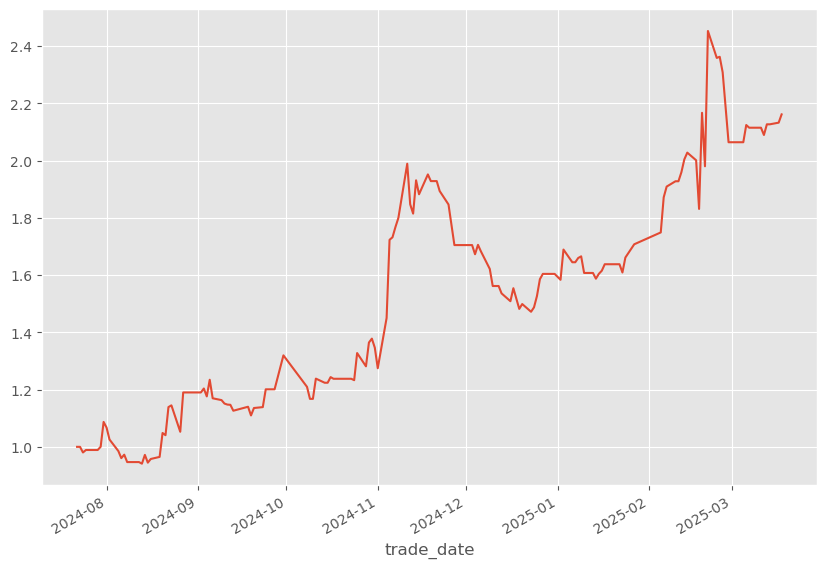

In [92]:
df_day['PnL'].cumsum().apply(np.exp).plot()

In [94]:
df_day.to_csv('PnL.csv')